In [3]:
print ("hello")

import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

hello


In [6]:


# Load DF
df_eolienne = pd.read_csv("../data/prod/prod_eolienne.csv")
df_hydro = pd.read_csv("../data/prod/prod_hydro.csv")
df_solaire = pd.read_csv("../data/prod/prod_solaire.csv")

# Test print 5 lignes (row)
print("Eolienne:")
display(df_eolienne.head())

print("Hydro:")
display(df_hydro.head())

print("Solaire:")
display(df_solaire.head())


Eolienne:


,date,prod_eolienne
0,2016-09-01,100.000000
1,2016-09-02,100.000000
2,2016-09-03,100.000000
3,2016-09-04,96.844120
4,2016-09-05,97.088424


Hydro:


,date_obs_elab,prod_hydro
0,2022-08-01,200.0
1,2022-09-01,200.0
2,2022-10-01,200.0
3,2022-11-01,200.0
4,2022-12-01,0.0


Solaire:


,date,prod_solaire
0,2016-09-01,77.163310
1,2016-09-02,72.371632
2,2016-09-03,31.906049
3,2016-09-04,22.494454
4,2016-09-05,68.105196


=== Exploration de Eolienne ===


Infos générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308 entries, 0 to 3307
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3308 non-null   object 
 1   prod_eolienne  3308 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.8+ KB


None


Valeurs manquantes :


date             0
prod_eolienne    0
dtype: int64


Statistiques descriptives :


,prod_eolienne
count,3308.000000
mean,60.261740
std,27.466505
min,-48.997601
25%,44.321585
50%,61.730794
75%,76.859869
max,833.516984


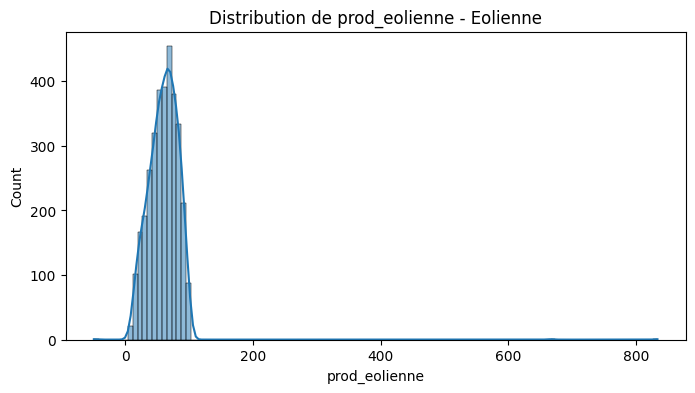

=== Exploration de Hydro ===


Infos générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date_obs_elab  996 non-null    object 
 1   prod_hydro     996 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.7+ KB


None


Valeurs manquantes :


date_obs_elab    0
prod_hydro       0
dtype: int64


Statistiques descriptives :


,prod_hydro
count,996.000000
mean,192.138907
std,71.216446
min,0.000000
25%,200.000000
50%,200.000000
75%,200.000000
max,2000.000000


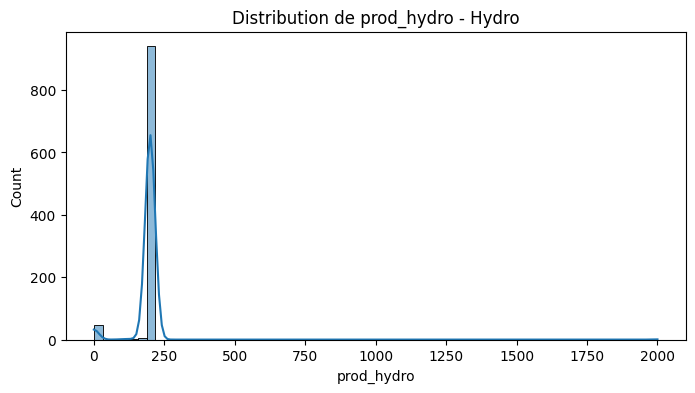

=== Exploration de Solaire ===


Infos générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3312 non-null   object 
 1   prod_solaire  3310 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.9+ KB


None


Valeurs manquantes :


date            0
prod_solaire    2
dtype: int64


Statistiques descriptives :


,prod_solaire
count,3310.000000
mean,47.797643
std,30.228459
min,0.000000
25%,23.341965
50%,43.828634
75%,71.486126
max,551.908083


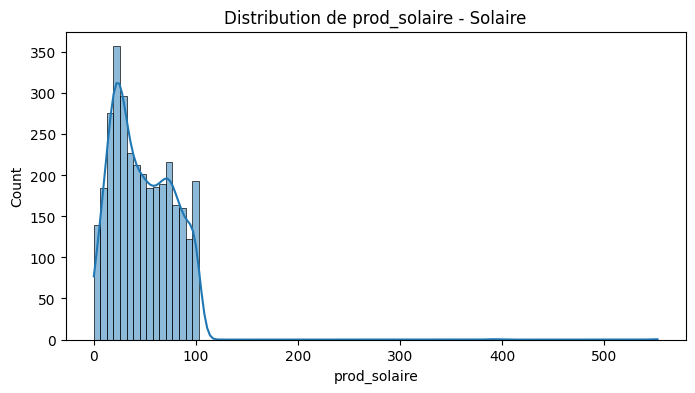

In [3]:

# Explo rapide
def explore_df(df, name):
    print(f"=== Exploration de {name} ===\n")
    print("\nInfos générales :")
    display(df.info())
    print("\nValeurs manquantes :")
    display(df.isnull().sum())
    print("\nStatistiques descriptives :")
    display(df.describe())
    
    # Visu rapide
    num_cols = df.select_dtypes(include="number").columns
    for col in num_cols:
        plt.figure(figsize=(8,4))
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution de {col} - {name}")
        plt.show()

# Explo individuelle
explore_df(df_eolienne, "Eolienne")
explore_df(df_hydro, "Hydro")
explore_df(df_solaire, "Solaire")


In [4]:

# Conversion en datetime
df_eolienne["date"] = pd.to_datetime(df_eolienne["date"], errors="coerce")

df_hydro["date_obs_elab"] = pd.to_datetime(df_hydro["date_obs_elab"], errors="coerce")

df_solaire["date"] = pd.to_datetime(df_solaire["date"], errors="coerce")

print(df_eolienne["date"].dtype) 
print(df_hydro["date_obs_elab"].dtype)
print(df_solaire["date"].dtype)


datetime64[ns]
datetime64[ns]
datetime64[ns]


In [5]:
# Rename de la colonne date_obs_elab du df_hydro pour matcher avec les 2 autres DF
df_hydro.rename(columns={'date_obs_elab' : 'date'},inplace=True)
df_hydro.head()

,date,prod_hydro
0,2022-08-01,200.0
1,2022-09-01,200.0
2,2022-10-01,200.0
3,2022-11-01,200.0
4,2022-12-01,0.0


In [6]:
# Localiser les doublons dans les 3 df

for name, df in [("Eolienne", df_eolienne), ("Hydro", df_hydro), ("Solaire", df_solaire)]:
    print(f"\n=== {name} ===")
    doublons = df[df.duplicated(subset=["date"], keep=False)]
    if doublons.empty:
        print("Aucun doublon trouvé ✅")
    else:
        print(f"{len(doublons)} doublons trouvés")
        display(doublons.sort_values("date").head(70))  



=== Eolienne ===
Aucun doublon trouvé ✅

=== Hydro ===
60 doublons trouvés


,date,prod_hydro
0,2022-08-01,200.0
61,2022-08-01,200.0
1,2022-09-01,200.0
92,2022-09-01,200.0
2,2022-10-01,200.0
122,2022-10-01,200.0
3,2022-11-01,200.0
153,2022-11-01,200.0
4,2022-12-01,0.0
183,2022-12-01,200.0



=== Solaire ===
Aucun doublon trouvé ✅


In [7]:
# Suppression des doublons (surtout pour df_hydro)
# A voir si on laisse pour tout en cas d'automatisation avec nouvelle data
# On garde la dernière occurence car c'est les premières qui sont mal classées

# Suppression des doublons
df_eolienne = df_eolienne.drop_duplicates(subset=["date"], keep="last")
df_hydro = df_hydro.drop_duplicates(subset=["date"], keep="last")
df_solaire = df_solaire.drop_duplicates(subset=["date"], keep="last")

# Vérification
print("Eolienne :", df_eolienne["date"].duplicated().sum(), "doublons restants")
print("Hydro    :", df_hydro["date"].duplicated().sum(), "doublons restants")
print("Solaire  :", df_solaire["date"].duplicated().sum(), "doublons restants")


Eolienne : 0 doublons restants
Hydro    : 0 doublons restants
Solaire  : 0 doublons restants


In [8]:

# Supprimer la data unique pour un mois sur df_hydro (chaque début de moi en 2025 pour 6 mois)
# En gros, 6 data inutiles à supprimer
df_hydro = df_hydro[
    df_hydro.groupby(df_hydro['date'].dt.to_period('M'))['date'].transform('count') > 1
]




In [ ]:
# # Identifier les dates manquantes

# # === Solaire ===
# all_dates_solaire = pd.date_range(start=df_solaire['date'].min(), end=df_solaire['date'].max(), freq="D")
# missing_solaire = all_dates_solaire.difference(df_solaire['date'])
# print("Dates manquantes solaire :", missing_solaire)

# # === Éolienne ===
# all_dates_eolienne = pd.date_range(start=df_eolienne['date'].min(), end=df_eolienne['date'].max(), freq="D")
# missing_eolienne = all_dates_eolienne.difference(df_eolienne['date'])
# print("Dates manquantes éolienne :", missing_eolienne)

# # === Hydro ===
# all_dates_hydro = pd.date_range(start=df_hydro['date'].min(), end=df_hydro['date'].max(), freq="D")
# missing_hydro = all_dates_hydro.difference(df_hydro['date'])
# print("Dates manquantes hydro :", missing_hydro)


Dates manquantes solaire : DatetimeIndex(['2020-02-16', '2020-04-27', '2020-05-12', '2020-09-06'], dtype='datetime64[ns]', freq=None)
Dates manquantes éolienne : DatetimeIndex(['2016-09-22', '2016-09-23', '2016-09-24', '2016-09-25',
               '2017-05-17', '2018-04-15', '2018-04-16', '2019-06-23'],
              dtype='datetime64[ns]', freq=None)
Dates manquantes hydro : DatetimeIndex(['2022-12-19', '2022-12-20', '2023-05-22'], dtype='datetime64[ns]', freq=None)


In [10]:
# Fonction pour combler les dates manquantes par la médiane mensuelle
# En tenant compte qu'on a pas la même plage calendaire entre df_eolienne / df_solaire & df_hydro
def fill_missing_with_monthly_median(df, col_date, col_value, date_min, date_max):
    # Reindexer sur la plage complète
    df = df.set_index(col_date).reindex(
        pd.date_range(start=date_min, end=date_max, freq="D")
    )
    df.index.name = col_date

    # Remplir avec la médiane mensuelle
    df[col_value] = df[col_value].fillna(
        df.groupby([df.index.year, df.index.month])[col_value].transform("median")
    )

    return df.reset_index()


# Application

# Pour solaire et éolienne (plage commune)
date_min = min(df_solaire['date'].min(), df_eolienne['date'].min())
date_max = max(df_solaire['date'].max(), df_eolienne['date'].max())

df_solaire = fill_missing_with_monthly_median(df_solaire, "date", "prod_solaire", date_min, date_max)
df_eolienne = fill_missing_with_monthly_median(df_eolienne, "date", "prod_eolienne", date_min, date_max)

# Pour hydro (plage spécifique)
date_min_hydro = df_hydro['date'].min()
date_max_hydro = df_hydro['date'].max()

df_hydro = fill_missing_with_monthly_median(df_hydro, "date", "prod_hydro", date_min_hydro, date_max_hydro)


In [11]:
# Suppression des abérations sur les 3 df (positives comme négatives)
# On remplace l'abération par la médiane du mois en cours

def replace_outliers_with_monthly_median(df, col_date, col_value, min_val, max_val):
    # Détection des valeurs aberrantes
    mask_outliers = (df[col_value] < min_val) | (df[col_value] > max_val)

    # Calcul des médianes mensuelles
    monthly_medians = (
        df.groupby([df[col_date].dt.year, df[col_date].dt.month])[col_value]
        .transform("median")
    )

    # Remplacement des valeurs aberrantes
    df.loc[mask_outliers, col_value] = monthly_medians[mask_outliers]

    return df


# Application

# Solaire : bornes 0 à 100
df_solaire = replace_outliers_with_monthly_median(df_solaire, "date", "prod_solaire", 0, 100)

# Éolienne : bornes 0 à 100
df_eolienne = replace_outliers_with_monthly_median(df_eolienne, "date", "prod_eolienne", 0, 100)

# Hydro : bornes 0 à 200
df_hydro = replace_outliers_with_monthly_median(df_hydro, "date", "prod_hydro", 0, 200)
